# [Exploration 16] SRGAN 활용하기 

SRGAN, Bicubic Interpolation을 이용해 이미지의 해상도를 높이는 Super Resolution 프로젝트

---

## 프로젝트 목표
- 이미지 해상도에 대한 이해
- Bicubic Interpolation, SRGAN으로 실험 후 비교


## 프로젝트 1: 직접 고른 이미지로 SRGAN 실험하기
### 1-1. 높은 해상도를 가진 이미지로 실험
1. (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.
3. 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
4. 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.
5. 3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
6. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

### 1-2. 낮은 해상도를 가진 이미지로 실험
1. (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
3. 1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.
4. 2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
5. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)
---
## 1-1. 고해상도 이미지 실험
### 이미지 불러오기
- 고해상도 이미지를 불러옵니다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
from PIL import Image
import tensorflow as tf

(860, 574)


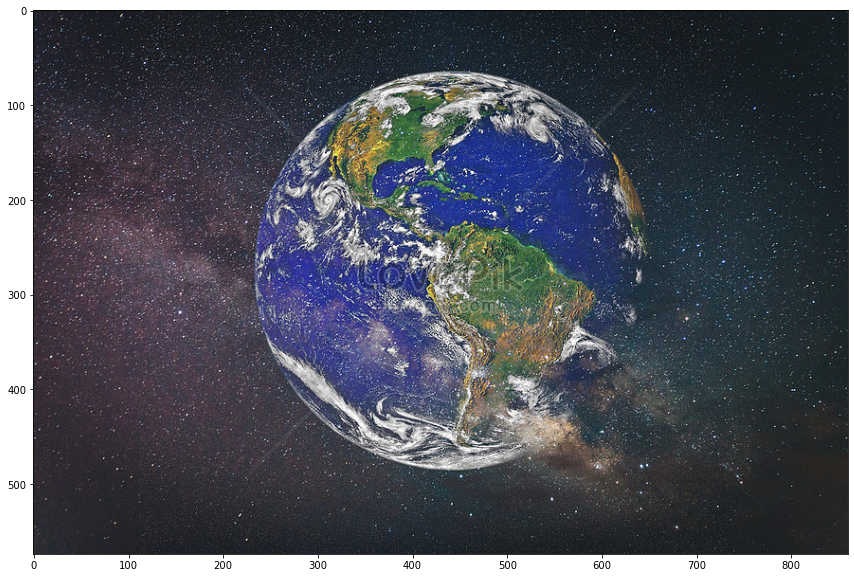

In [2]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/earth.jpg'
hr = Image.open(image_path)
print(hr.size)
plt.figure(figsize=(20,10))
plt.imshow(hr)

### Bicubic 적용
- 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다.

In [3]:
w, h = hr.size[0], hr.size[1]
print(w, h)

860 574


(143, 215, 3)


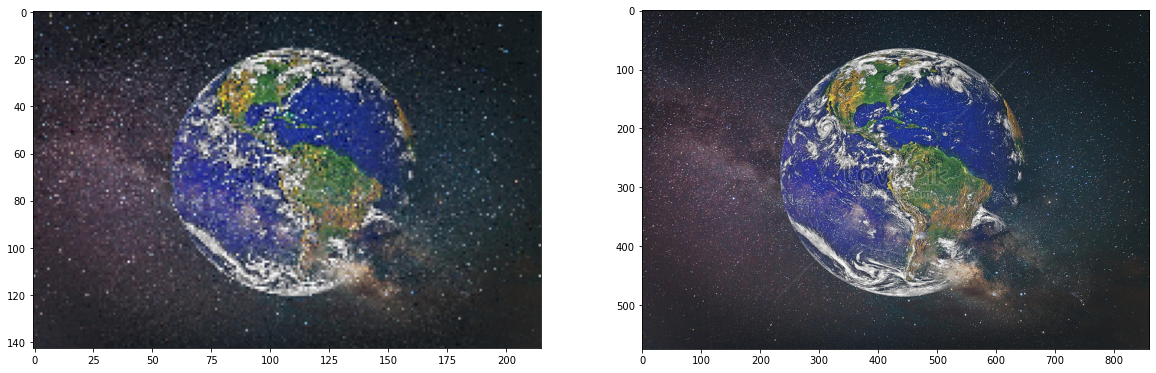

In [4]:
hr = np.array(hr)
bicubic_lr = cv2.resize(hr, dsize=(w//4, h//4), interpolation=cv2.INTER_CUBIC) # bicubic 설정
print(bicubic_lr.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_lr)
plt.subplot(1,2,2); plt.imshow(hr)

### SRGAN 학습, 고해상도 이미지 생성
- SRGAN 모델 불러오기 (DIV2K 데이터셋으로 학습)
- 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 

In [5]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [6]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(bicubic_lr)
print(srgan_hr.shape)

(572, 860, 3)


### 결과 시각화
- 3개 이미지(Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지)를 나란히 시각화합니다.
- 이 때 모든 이미지의 크기를 원본과 똑같이 설정합니다.

(574, 860, 3)


Text(0.5, 1.0, 'original hr image')

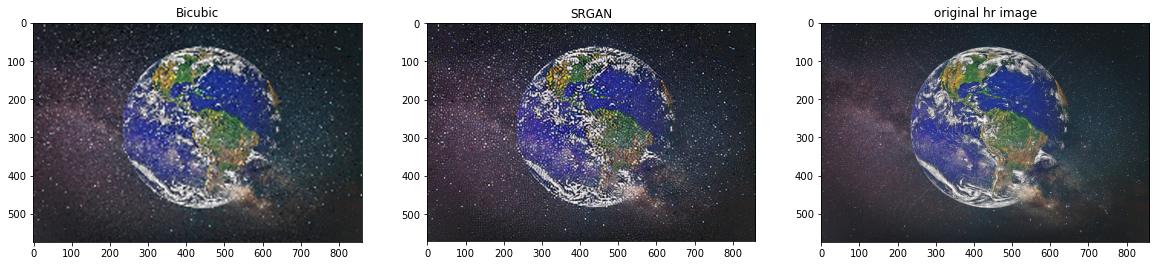

In [7]:
bicubic_lr_resized = cv2.resize(bicubic_lr, dsize=(w, h), interpolation=cv2.INTER_CUBIC) # bicubic 설정
print(bicubic_lr_resized.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(bicubic_lr_resized); plt.title('Bicubic')
plt.subplot(1,3,2); plt.imshow(srgan_hr); plt.title('SRGAN')
plt.subplot(1,3,3); plt.imshow(hr); plt.title('original hr image')

- 더 정확히 화질을 보기 위해 특정 부분만 잘라서 확인합니다. 

In [8]:
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

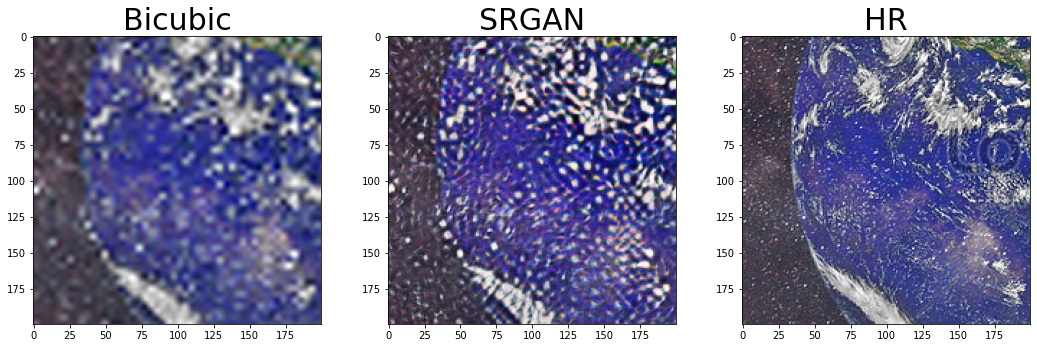

In [9]:
left_top = (200, 200)

images = []
img1 = crop(bicubic_lr_resized, left_top, 200, 200)
img2 = crop(srgan_hr , left_top, 200, 200)
img3 = crop(hr, left_top, 200, 200)
images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(3):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

**완벽하게 화질을 복구하진 못했지만 Bicubic보다 SRGAN의 성능이 더 좋은 것을 확인할 수 있습니다.**

- 화질을 복구하지 못한 이유
    : 선택한 원 이미지의 해상도가 너무 높았기 때문이라고 생각한다. 
    
## 1-2. 저해상도 이미지 실험
### 이미지 불러오기
- 적당한 저해상도 이미지를 불러옵니다.

(512, 384)
(96, 128, 3)


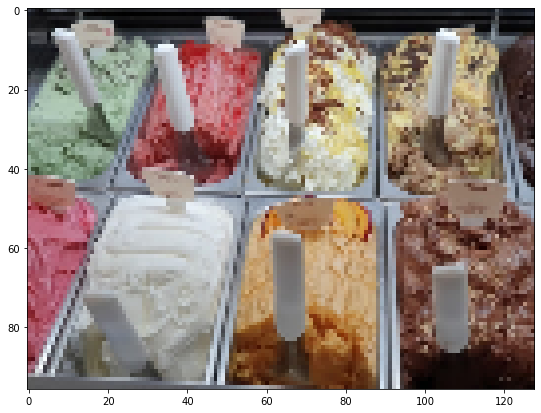

In [24]:
image_path = os.getenv('HOME')+'/aiffel/super_resolution/test_lr.jpg'
lr = Image.open(image_path)
print(lr.size)

lr = np.array(lr)
h, w = lr.shape[0], lr.shape[1]

bicubic_lr = cv2.resize(lr, dsize=(w//4, h//4), interpolation=cv2.INTER_CUBIC) # bicubic 설정
print(bicubic_lr.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_lr)

### SRGAN 학습, 고해상도 이미지 생성  
- 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

In [25]:
srgan_hr = apply_srgan(bicubic_lr)
print(srgan_hr.shape)

(384, 512, 3)


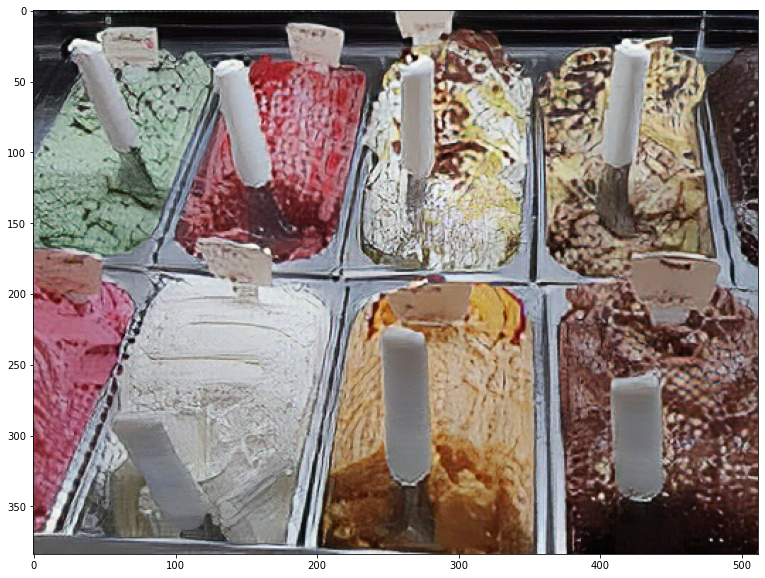

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(srgan_hr)

### 저화질 이미지의 픽셀 수를 4배로 늘이기
- 원본 저화질 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘인다.

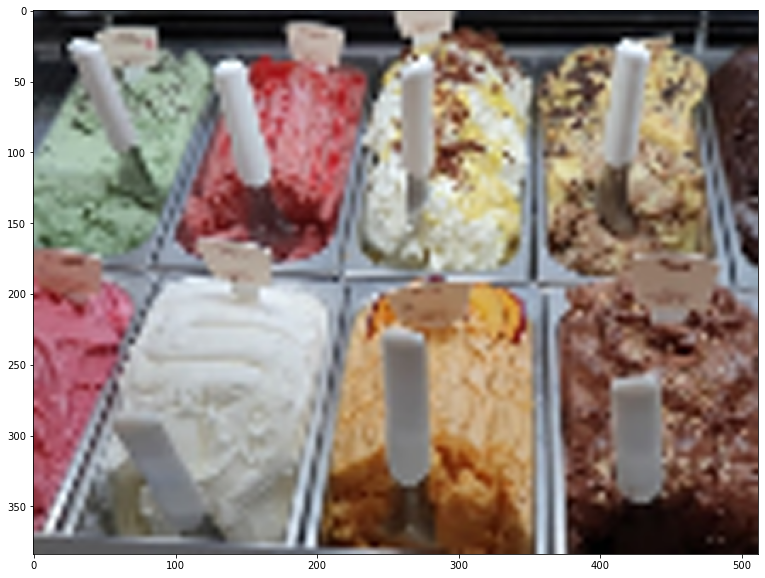

In [26]:
bicubic_hr = cv2.resize(bicubic_lr, dsize=(w, h), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(20,10))
plt.imshow(bicubic_hr)

### 결과 시각화
- 2개 이미지(Bicubic의 결과, SRGAN의 결과)를 나란히 시각화합니다.

Text(0.5, 1.0, 'Bicubic')

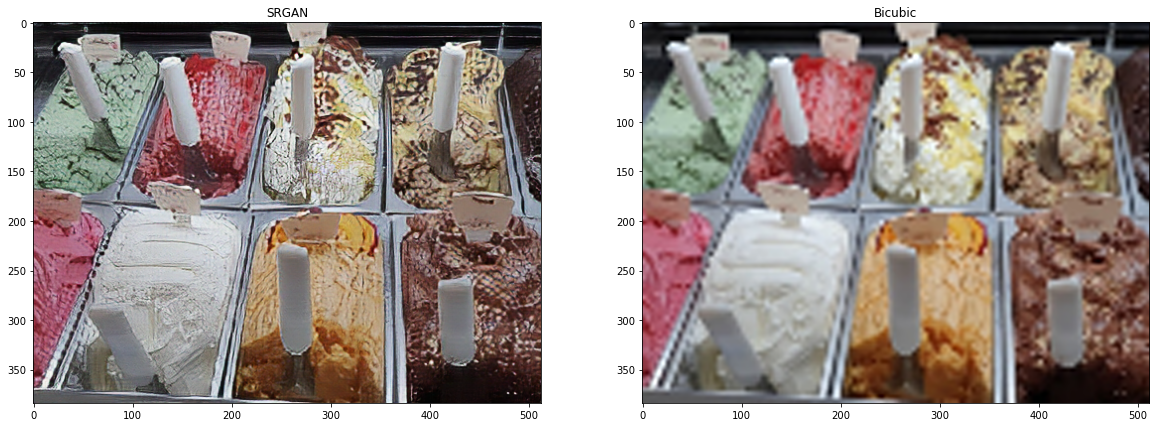

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(srgan_hr); plt.title('SRGAN')
plt.subplot(1,2,2); plt.imshow(bicubic_hr); plt.title('Bicubic')

**자르지 않아도 평가할 수 있기에 원본 전체를 봤습니다.**
- SRGAN이 화질 복원을 더 잘 한 것을 볼 수 있습니다. 

## 프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기
이전 Super Resolution의 활용 사례에 대해 살펴봤을 때, 단일 이미지가 아닌 영상에 대해 Super Resolution을 적용한 사례가 있었습니다. 이번에는 이미 학습된 **SRGAN을 이용**해 **저해상도 영상을 고해상도 영상**으로 바꿔보는 프로젝트를 수행해 봅시다.

실제로 동영상의 Super Resolution은 시간 순서에 따른 다수의 프레임 정보를 고려하는 것이 더 좋지만, 처음부터 학습시키기에 많은 시간이 소요됩니다. 여기서는 이전에 사용했던 SRGAN을 이용해 한 프레임씩 고해상도 이미지로 변환 시켜 모든 프레임에 대해 적용하고, 그 프레임들을 합쳐 동영상으로 만들어 봅시다.

### gif 불러오기
- 저해상도의 gif 파일을 불러옵니다. 

In [43]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif_path = os.getenv('HOME')+'/aiffel/super_resolution'
gif = cv2.VideoCapture(gif_path + '/fire_lr.gif')

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 14
frame 크기 : (282, 300, 3)


### 프레임 별 Super Resolution진행
- 프레임(리스트)으로 변환한 후 Bicubic interpolation, SRGAN으로 픽셀 수를 늘여 고해상도로 변환합니다. 

In [40]:
frames_sr_bicubic = []
for i in frames: 
    bi_i = cv2.resize(i, dsize=(i.shape[0]*4, i.shape[1]*4), interpolation=cv2.INTER_CUBIC) 
    frames_sr_bicubic.append(bi_i)

In [42]:
frames_sr_srgan = []
for i in frames: 
    srgan_i = apply_srgan(i)
    frames_sr_srgan.append(srgan_i)

### 프레임을 합쳐 gif생성 

In [54]:
len(frames_sr_bicubic)

14

In [56]:
import imageio

imageio.mimsave(gif_path + "/fire_hr_bicubic.gif", frames_sr_bicubic[:7])
imageio.mimsave(gif_path + "/fire_hr_srgan.gif", frames_sr_srgan[:7])

### gif 확인하기
- 원본 (저해상도)

In [61]:
from IPython.display import Image as show_gif

# show_gif(gif_path + "/fire_lr.gif", width=400)

<img src="https://user-images.githubusercontent.com/68461606/111324453-2352ea00-86ae-11eb-9634-10af15c943ad.gif" width="400" height="400" />

- Bicubic Super Resolution

In [60]:
# show_gif(gif_path + "/fire_hr_bicubic.gif", width=400)

<img src="https://user-images.githubusercontent.com/68461606/111322830-ae32e500-86ac-11eb-96ef-c57641163391.gif" width="400" height="400" />

- SRGAN Super Resolution

In [59]:
# show_gif(gif_path + "/fire_hr_srgan.gif", width=400)

<img src="https://user-images.githubusercontent.com/68461606/111322837-affca880-86ac-11eb-981a-3c60f9795b3d.gif" width="400" height="400" />

**장작 안쪽을 보면 확실하게 SRGAN이 고화질로 잘 생성한 것을 볼 수 있습니다.**

# 루브릭 평가
---
1. **SRGAN을 이용해 고해상도의 이미지를 생성하였다.**   

    - 생성한 여러 이미지를 시각화했습니다.


2. **다양한 해상도의 이미지에 대해 시각화를 통해 원본, SRGAN생성본, interpolation생성본을 비교분석하였다.**

    - 여러 데이터셋을 사용해 미리 학습된 SRGAN이 확실히 더 성능이 좋았습니다. 
     
     
3. **저해상도 gif 동영상을 고해상도 동영상으로 성공적으로 변환하였다.** 

    - gif 영상을 프레임으로 변환 후 고해상도로 변환했습니다.

    
    
# 회고
---
## 어려웠던 점 
- 구현은 했지만, SRGAN 아키텍쳐에 대한 상세한 이해가 필요할 것 같습니다. 
    
## 알게된 점 
- 해상도 변환을 GAN으로 생성하는 방법에 대해 알 수 있었습니다. 

## 다짐
- 시간적인 문제로 보다 다양한 데이터에 대한 실험을 하지 못한 것이 아쉬웠던 프로젝트입니다. 보통 제공되는 데이터는 어느정도의 결과를 얻을 수 있는 좋은 데이터이기 때문에, 실제 다양한 데이터로 실험을 해야 강건성에 대한 평가를 할 수 있습니다. 사전학습된 모델을 사용하면 정말 빠른 시간내에 결과를 얻을 수 있다는 것을 알았고, 다량의 데이터와 컴퓨팅 파워의 중요성을 느꼈습니다. 또한 결과를 단지 사람 눈으로만 평가해야한다는 것이 아쉽기도 했습니다. 실제로 gif의 경우엔 제 눈에는 bicubic으로 고화질 변환한 이미지가 원본 저화질 이미지보다 화질이 떨어지게 느껴졌는데, 객관적인 지표가 없어 정확한 평가가 어려웠습니다.